# Exploratory Data Analysis for Grassland - Naiman Mongolia

In [1]:
# import libraries 
import numpy as np
import rasterio
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Set all Data Path 

In [2]:
# Set all data path 

South_RasterPath = 'D:/Mongolia_Grassland_Mapping/DATA/Output/SouthClip.tif'
South_MaskPath = 'D:/Mongolia_Grassland_Mapping/DATA/Output/South_mask.tif'
North_RasterPath = 'D:/Mongolia_Grassland_Mapping/DATA/Output/NorthClip.tif'
North_MaskPath = 'D:/Mongolia_Grassland_Mapping/DATA/Output/North_mask.tif'

target = 'class'

## Load Contextual Features 

In [3]:
# South Raster
SouthRaster  = rasterio.open(South_RasterPath)
SouthRaster_array = SouthRaster.read()
print('South raster shape:', SouthRaster_array.shape)

# North Raster
NorthRaster  = rasterio.open(North_RasterPath)
NorthRaster_array = NorthRaster.read()
print('North raster shape:', NorthRaster_array.shape)


South raster shape: (27, 1905, 2489)
North raster shape: (27, 628, 1409)


In [4]:
# Bandnames

bandname = ['fourier_sc10_mean', 'fourier_sc20_mean', 'fourier_sc40_mean', 'fourier_sc200_mean', 'gabor_sc40_mean', 'hog_sc10_max', 'hog_sc40_variance', 'mean_sc10_mean', 'mean_sc20_mean', 'mean_sc20_variance', 'mean_sc40_variance', 'lsr_sc40_line_length', 'lsr_sc40_line_mean', 'lsr_sc200_line_mean', 'lbpm_sc10_kurtosis', 'lbpm_sc20_kurtosis', 'lbpm_sc10_max', 'lbpm_sc20_max', 'lbpm_sc40_max', 'lbpm_sc40_skew', 'lbpm_sc20_variance', 'lbpm_sc40_variance', 'lbpm_sc200_max', 'orb_sc40_variance', 'orb_sc40_mean', 'orb_sc10_kurtosis', 'orb_sc200_variance']

## Convert from Numpy array to Pandas DataFrame

In [5]:
# Convert South boundary to Pandas Dataframe

South_Data_Array = SouthRaster_array[:, SouthRaster_array[0,...]!=-9999]
South_Data_Array= np.transpose(South_Data_Array)
South_Data_df = pd.DataFrame(South_Data_Array, columns=bandname)
print(South_Data_df.shape)

# Convert North boundary to Pandas Dataframe

North_Data_Array = NorthRaster_array[:, NorthRaster_array[0,...]!=-9999]
North_Data_Array= np.transpose(North_Data_Array)
North_Data_df = pd.DataFrame(North_Data_Array, columns=bandname)
print(North_Data_df.shape)

(3205339, 27)
(501305, 27)


In [6]:
North_Data_df.describe()

,fourier_sc10_mean,fourier_sc20_mean,fourier_sc40_mean,fourier_sc200_mean,gabor_sc40_mean,hog_sc10_max,hog_sc40_variance,mean_sc10_mean,mean_sc20_mean,mean_sc20_variance,...,lbpm_sc20_max,lbpm_sc40_max,lbpm_sc40_skew,lbpm_sc20_variance,lbpm_sc40_variance,lbpm_sc200_max,orb_sc40_variance,orb_sc40_mean,orb_sc10_kurtosis,orb_sc200_variance
count,501305.000000,501305.000000,501305.000000,501305.000000,501305.000000,501305.000000,501305.000000,501305.000000,501305.000000,501305.000000,...,501305.000000,501305.000000,501305.000000,501305.000000,501305.000000,501305.000000,501305.000000,501305.000000,501305.000000,501305.000000
mean,94.830109,99.383492,113.449303,148.170303,10.672136,0.259102,0.003341,58.202305,30.391254,27704.957031,...,196.112457,773.961792,0.000018,973.878967,14544.961914,19275.886719,90.352203,5.743937,1233.097656,49236.195312
std,11.625732,318.199982,258.809509,119.981377,1.801395,0.083096,0.002793,15.293756,6.441053,7832.514160,...,29.876619,92.276474,0.000003,259.272919,2687.637695,1661.435181,55.135460,28.338097,8081.502441,23981.599609
min,-29.605518,-9999.000000,-9999.000000,-9999.000000,1.710473,0.121414,0.000010,0.983339,1.189346,677.851318,...,95.315025,389.000000,0.000004,458.157837,7910.278809,14044.000000,-9999.000000,-9999.000000,-9999.000000,1811.119507
25%,87.831459,105.117645,116.351593,146.689774,9.473742,0.198406,0.001364,48.852859,26.087835,22344.308594,...,175.900528,713.000000,0.000016,811.507629,12772.673828,18237.000000,51.946606,4.357143,17.188330,29782.970703
50%,96.360352,110.773170,121.002747,150.310028,10.809924,0.239706,0.002718,61.044971,30.996876,28047.447266,...,194.199142,764.000000,0.000018,920.272766,13950.048828,18905.000000,91.387276,6.142857,39.587536,50065.968750
75%,103.313438,114.653915,124.401260,152.921585,12.028136,0.299530,0.004492,70.362640,35.354717,33514.550781,...,214.436539,826.000000,0.000020,1069.555420,15625.330078,19876.000000,127.557579,7.500000,144.511383,69488.906250
max,123.213638,128.591003,132.714233,157.236237,14.760816,0.969733,0.035984,79.713112,42.426628,45171.210938,...,387.197571,1304.000000,0.000030,6269.465332,42820.441406,26098.000000,243.566528,10.607142,42407.367188,102882.976562


## Mapping Correlation in features 

[Text(0.5, 1.0, 'South Boundary')]

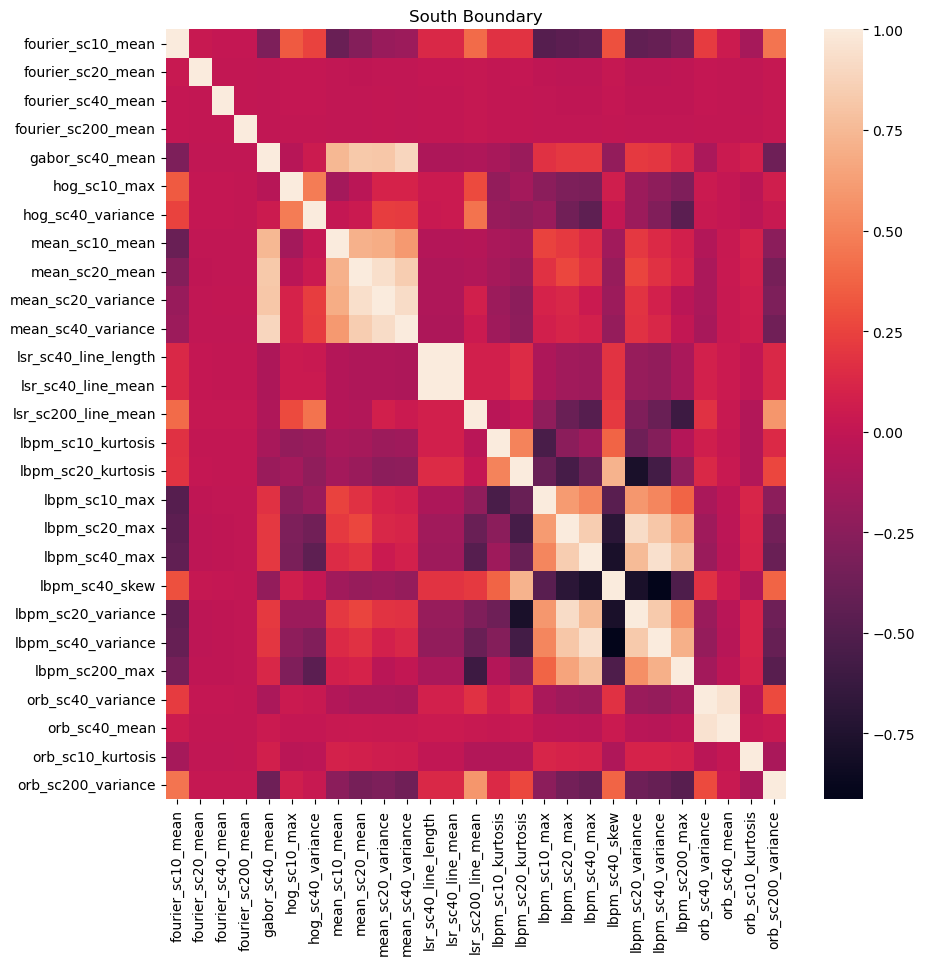

In [7]:
# South Boundary 
fig, ax = plt.subplots(figsize= (10,10),sharey=True)

sns.heatmap(South_Data_df.corr()).set(title='South Boundary')

[Text(0.5, 1.0, 'North Boundary')]

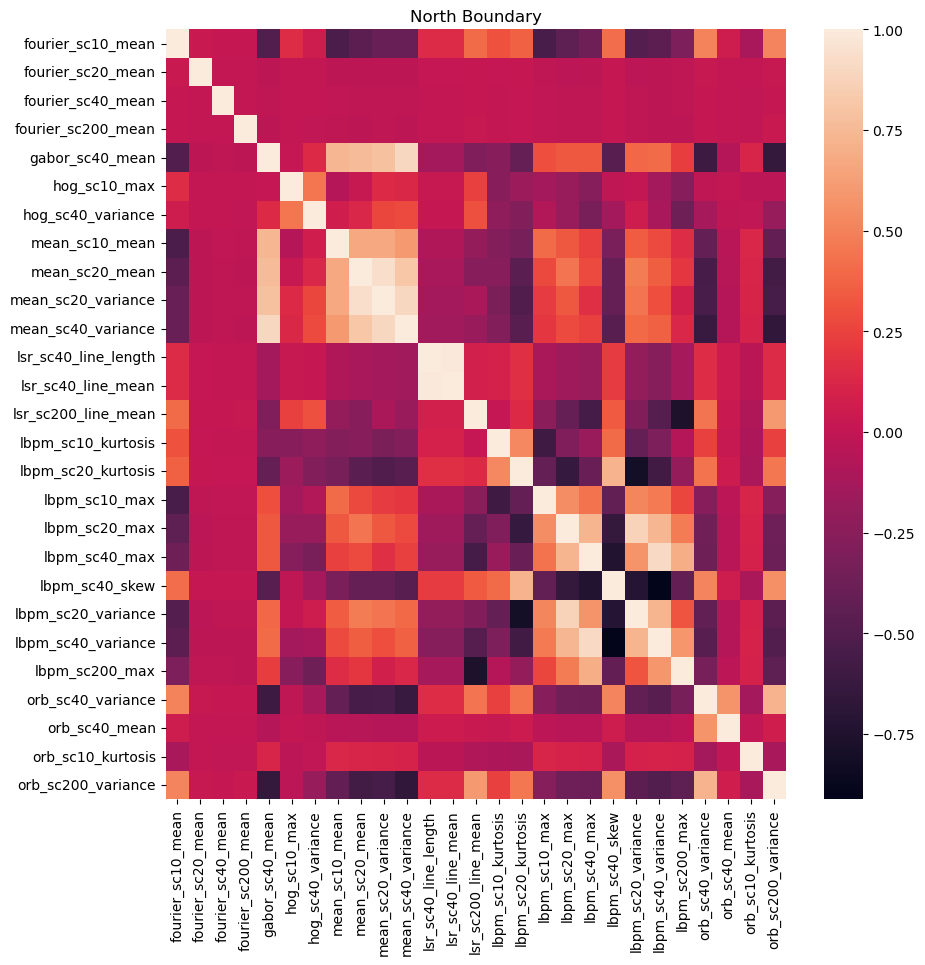

In [8]:
# North Boundary 
fig, ax = plt.subplots(figsize= (10,10),sharey=True)

sns.heatmap(North_Data_df.corr()).set(title='North Boundary')

 ## Load Trainig Data

In [10]:
# Load South Boundary
South_train_img = rasterio.open(South_MaskPath)
South_train_array = South_train_img.read()
print('South Train', South_train_array.shape)

# Load North Boundary
North_train_img = rasterio.open(North_MaskPath)
North_train_array = North_train_img.read()
print('North Train:', North_train_array.shape)

South Train (1, 1905, 2489)
North Train: (1, 628, 1409)


In [11]:
# Concatenate Data and Trainset

# South 
South_data = np.concatenate((South_train_array, SouthRaster_array), axis=0)
print('South Data:', South_data.shape)

# North 
North_data = np.concatenate((North_train_array, NorthRaster_array), axis=0)
print('North Data:', North_data.shape)

South Data: (28, 1905, 2489)
North Data: (28, 628, 1409)


In [12]:
# Convert to Pandas Dataframe

# South
names = [target] + bandname
# South_data_arr = South_data.flatten()
# print ('South Flatten:', South_data_arr.shape)


South_data_arr1 = South_data[:, South_data[0,...]!=-9999.000000]
South_data_arr2 = South_data_arr1[:, South_data_arr1[0,...]!=0]
South_data_arr3= np.transpose(South_data_arr2)
South_df_full = pd.DataFrame(South_data_arr3, columns=names)


# North
North_data_arr1 = North_data[:, North_data[0,...]!=-9999]
North_data_arr2 = North_data_arr1[:, North_data_arr1[0,...]!=0]
North_data_arr2= np.transpose(North_data_arr2)
North_df_full = pd.DataFrame(North_data_arr2, columns=names)

In [13]:
South_df_full.head()
South_df_full.describe()

,class,fourier_sc10_mean,fourier_sc20_mean,fourier_sc40_mean,fourier_sc200_mean,gabor_sc40_mean,hog_sc10_max,hog_sc40_variance,mean_sc10_mean,mean_sc20_mean,...,lbpm_sc20_max,lbpm_sc40_max,lbpm_sc40_skew,lbpm_sc20_variance,lbpm_sc40_variance,lbpm_sc200_max,orb_sc40_variance,orb_sc40_mean,orb_sc10_kurtosis,orb_sc200_variance
count,22248.000000,22248.000000,22248.000000,22248.000000,22248.000000,22248.000000,22248.000000,22248.000000,22248.000000,22248.000000,...,22248.000000,22248.000000,22248.000000,22248.000000,22248.000000,22248.000000,22248.000000,22248.000000,22248.000000,22248.000000
mean,5.285644,-11.227621,16.455469,31.699808,66.075447,-65.243828,-78.386169,-75.051216,-21.869541,-46.643009,...,117.563408,685.265259,-75.055412,885.362793,14551.281250,18770.625000,-6.808507,-75.473511,1500.669434,37292.140625
std,2.050600,1009.626404,939.403809,913.533447,885.847351,863.920105,883.357849,863.064331,867.853516,860.332153,...,875.185059,937.686829,863.063904,971.273071,3909.864014,3505.855469,901.433899,893.742859,10158.977539,22170.804688
min,1.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,4.000000,82.521933,99.601961,110.972025,141.848370,8.302994,0.197243,0.001145,41.865078,22.102284,...,166.541367,673.000000,0.000015,792.814209,12382.172119,17264.000000,28.330040,3.000000,15.887230,18753.481445
50%,6.000000,91.719681,105.574177,115.556519,144.106827,9.872428,0.241566,0.003286,54.598352,27.727391,...,191.089340,758.000000,0.000018,910.153900,13900.213379,18835.500000,68.173840,5.178571,44.400463,36151.005859
75%,7.000000,99.504074,109.982256,118.838545,146.349312,11.672127,0.312700,0.006183,67.621170,33.955111,...,217.155659,851.000000,0.000020,1084.048889,16282.756348,20751.000000,109.523243,6.892857,215.839539,54211.700195
max,9.000000,122.083862,122.573631,131.759171,156.676590,14.477565,0.791052,0.029856,79.714828,42.278355,...,336.955780,1231.000000,0.000028,2744.114014,36098.835938,26573.000000,262.404449,11.071428,42407.367188,104446.484375


In [14]:
South_df_NoNan =  South_df_full.replace(-9999,np.NaN)
print(South_df_NoNan.describe())

North_df_NoNan =  North_df_full.replace(-9999,np.NaN)
print(North_df_NoNan.describe())


              class  fourier_sc10_mean  fourier_sc20_mean  fourier_sc40_mean  \
count  22248.000000       22023.000000       22054.000000       22065.000000   
mean       5.285644          90.813370         104.557327         114.891205   
std        2.050600          11.781426           7.759348           6.184021   
min        1.000000         -23.757866          50.624741          78.483742   
25%        4.000000          82.823044          99.785011         111.107338   
50%        6.000000          91.874992         105.655655         115.604233   
75%        7.000000          99.582390         110.027863         118.868538   
max        9.000000         122.083862         122.573631         131.759171   

       fourier_sc200_mean  gabor_sc40_mean  hog_sc10_max  hog_sc40_variance  \
count        22077.000000     22081.000000  22073.000000       22081.000000   
mean           144.035675         9.885797      0.266822           0.004240   
std              3.859219         2.256459

## Training Data Distribution


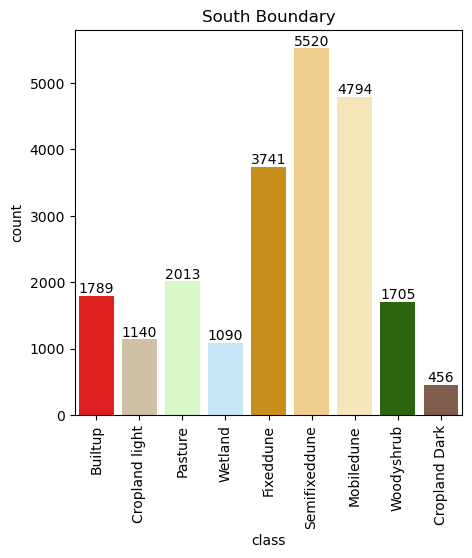

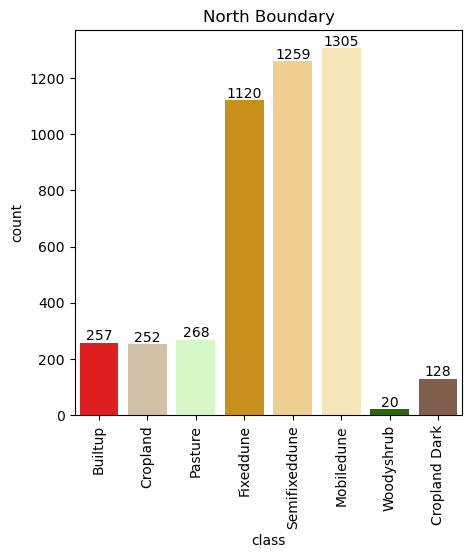

In [15]:
# Plot training clsss frequency

# South
color = ['#FF0000', '#D7C29E', '#D3FFBE', '#BEE8FF', '#E69800', '#FFD37F', '#FFEBAF', '#267300', '#895A44']
sns.set_palette(color)
fig, ax = plt.subplots(figsize= (5,5),sharey=True)
sns.countplot(data=South_df_NoNan, x='class', ax=ax).set(title='South Boundary')
classes = ['Builtup', 'Cropland light', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub', 'Cropland Dark']
ax.set_xticklabels(classes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for i in ax.containers:
    ax.bar_label(i,)

# North
color = ['#FF0000', '#D7C29E', '#D3FFBE', '#E69800', '#FFD37F', '#FFEBAF', '#267300', '#895A44']
sns.set_palette(color)
fig, ax = plt.subplots(figsize= (5,5),sharey=True)
sns.countplot(data=North_df_NoNan, x='class', ax=ax).set(title='North Boundary')
classes = ['Builtup', 'Cropland', 'Pasture', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub', 'Cropland Dark']
ax.set_xticklabels(classes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for i in ax.containers:
    ax.bar_label(i,)

## PCA

### Standadized data 

In [16]:
# remove Nan
South_df = South_df_NoNan.dropna(axis=0)

# The StandardScaler
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()

# Standardize the training data
South_df_standadized = ss.fit_transform(South_df)


# North
# remove Nan
North_df = North_df_NoNan.dropna(axis=0)

# Standardize the training data
North_df_standadized = ss.fit_transform(North_df)

In [17]:
# South


South_PCA_Data  = South_df_standadized[:]
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
south_view = pca.fit_transform(South_PCA_Data)

# North
# remove Nan
North_PCA_Data  = North_df_standadized[:]
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
North_view = pca.fit_transform(North_PCA_Data)

In [18]:
# labels = South_df_full['class']
# plt.scatter(view[:,0], view[:,1], c= labels)
# plt.xlabel('PCA-1')
# plt.ylabel('PCA-2')
South_df_standadized.shape

(19620, 28)

In [19]:
# Convert to dataframe
# South
South_df_ss = pd.DataFrame(South_df_standadized, columns=names)

# North
North_df_ss = pd.DataFrame(North_df_standadized, columns=names)

[Text(0.5, 1.0, 'PCA - South Boundary')]

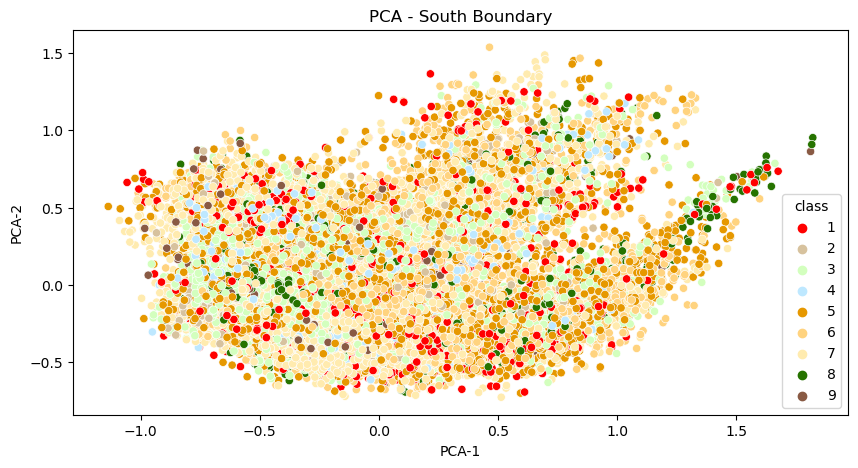

In [21]:
# South
col_name = ['PCA-1', 'PCA-2']
PCA_df = pd.DataFrame(south_view, columns=col_name)

fig, ax = plt.subplots(figsize=(10, 5), sharey=True, sharex=True)
color = ['#FF0000', '#D7C29E', '#D3FFBE', '#BEE8FF', '#E69800', '#FFD37F', '#FFEBAF', '#267300', '#895A44']
sns.set_palette(color)
labels = South_df_full['class']
labels = labels.astype(int)
sns.scatterplot(data=PCA_df, x='PCA-1', y='PCA-2', palette=color, hue=labels, alpha=1, ax=ax ).set(title='PCA - South Boundary')
# classes = ['Builtup', 'Cropland light', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub', 'Cropland Dark']

# plt.legend(title='Class', loc='upper right', labels=classes)
# plt.show(g)

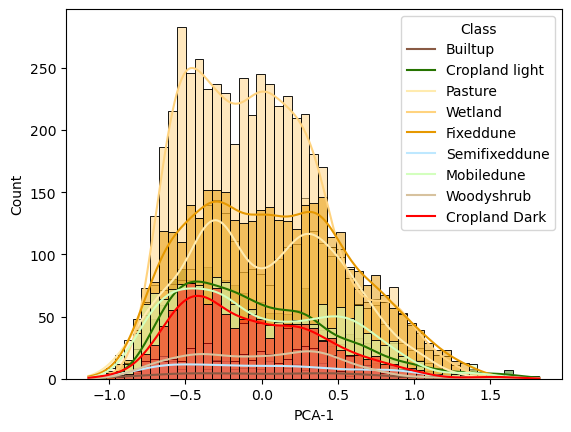

In [26]:
# fig, ax = plt.subplots(figsize=(5, 5), sharey=True, sharex=True)
South_class = South_df['class']
South_merge  = pd.concat([South_class, PCA_df], axis=1)
color = ['#FF0000', '#D7C29E', '#D3FFBE', '#BEE8FF', '#E69800', '#FFD37F', '#FFEBAF', '#267300', '#895A44']
sns.set_palette(color)
sns.histplot(data=South_merge, x="PCA-1", palette=color, hue='class', kde=True)
classes = ['Builtup', 'Cropland light', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub', 'Cropland Dark']
plt.legend(title='Class', loc='best', labels=classes)

[Text(0.5, 1.0, 'PCA - North Boundary')]

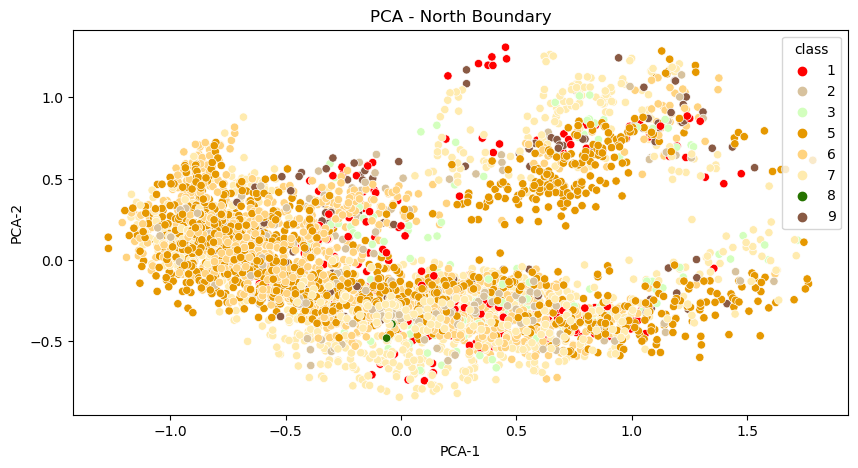

In [27]:

col_name = ['PCA-1', 'PCA-2']
PCA_df = pd.DataFrame(North_view, columns=col_name)

fig, ax = plt.subplots(figsize=(10, 5), sharey=True, sharex=True)
color = ['#FF0000', '#D7C29E', '#D3FFBE', '#E69800', '#FFD37F', '#FFEBAF', '#267300', '#895A44']
sns.set_palette(color)
labels = North_df_full['class']
labels = labels.astype(int)
sns.scatterplot(data=PCA_df, x='PCA-1', y='PCA-2', palette=color, hue=labels, alpha=1, ax=ax ).set(title='PCA - North Boundary')
# classes = ['Builtup', 'Cropland', 'Pasture', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub', 'Cropland Dark']
# plt.legend(title='Class', loc='upper right', labels=classes)

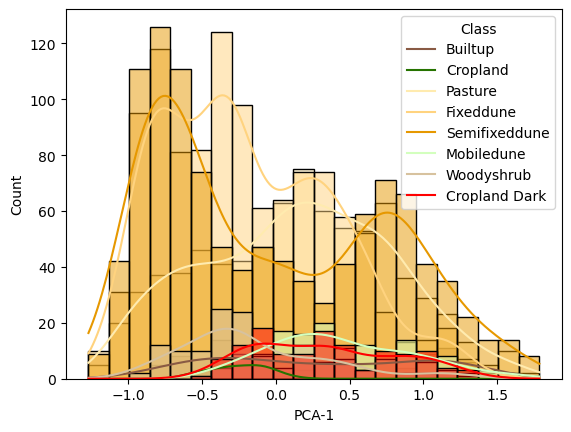

In [29]:
North_class = North_df['class']
North_merge  = pd.concat([North_class, PCA_df], axis=1)
color = ['#FF0000', '#D7C29E', '#D3FFBE', '#E69800', '#FFD37F', '#FFEBAF', '#267300', '#895A44']
sns.set_palette(color)
sns.histplot(data=North_merge, x="PCA-1", palette=color, hue='class', kde=True)
classes = ['Builtup', 'Cropland', 'Pasture', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub', 'Cropland Dark']
plt.legend(title='Class', loc='upper right', labels=classes)

<AxesSubplot: xlabel='fourier_sc10_mean', ylabel='Count'>

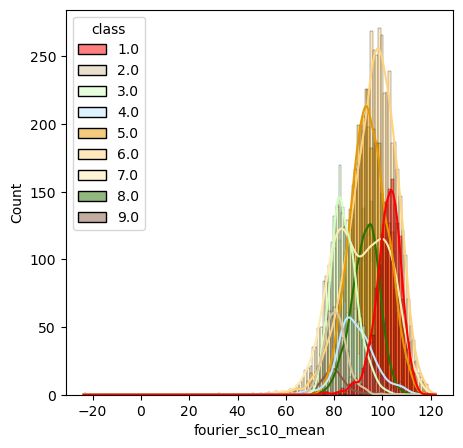

In [58]:
fig, ax = plt.subplots(figsize=(5, 5), sharey=True, sharex=True)
color = ['#FF0000', '#D7C29E', '#D3FFBE', '#BEE8FF', '#E69800', '#FFD37F', '#FFEBAF', '#267300', '#895A44']
sns.set_palette(color)
sns.histplot(data=South_df, x="fourier_sc10_mean", palette=color, hue='class', kde=True)

In [88]:
South_df_ss.head()

,class,fourier_sc10_mean,fourier_sc20_mean,fourier_sc40_mean,fourier_sc200_mean,gabor_sc40_mean,hog_sc10_max,hog_sc40_variance,mean_sc10_mean,mean_sc20_mean,...,lbpm_sc20_max,lbpm_sc40_max,lbpm_sc40_skew,lbpm_sc20_variance,lbpm_sc40_variance,lbpm_sc200_max,orb_sc40_variance,orb_sc40_mean,orb_sc10_kurtosis,orb_sc200_variance
0,1.870135,0.330898,-0.025040,-0.295594,0.707286,-0.310772,1.600752,0.638232,-0.086005,-0.440275,...,2.767899,1.397789,-1.306720,3.533912,1.409509,0.598454,-0.295523,-0.040872,-0.276119,0.393822
1,1.870135,-0.405903,0.065331,-0.234378,0.735388,-0.726532,0.516665,0.338681,-0.287870,-0.579945,...,2.433554,0.747023,-0.541463,2.818621,0.595572,0.548971,-0.309014,-0.152346,-0.282214,0.430105
2,1.870135,-1.060989,-0.509643,-0.236269,0.261882,-0.187595,0.863173,0.435990,0.181876,-0.103705,...,2.589256,1.871073,-1.867763,3.379200,2.127978,0.778092,-0.184272,-0.120496,-0.279009,-0.098358
3,1.870135,-1.602497,-0.432662,-0.367731,0.357493,-0.317984,0.248358,0.486179,-0.045173,-0.206902,...,2.483531,1.769655,-1.697832,3.223851,1.927409,0.729024,-0.337406,-0.088647,4.095269,0.036610
4,1.870135,-1.534450,-0.331941,-0.699377,0.422241,-0.298026,-0.708747,0.437148,0.034313,-0.313601,...,2.111915,1.287919,-1.043121,2.519406,1.186585,0.708648,-0.442305,-0.168271,-0.273028,0.132239


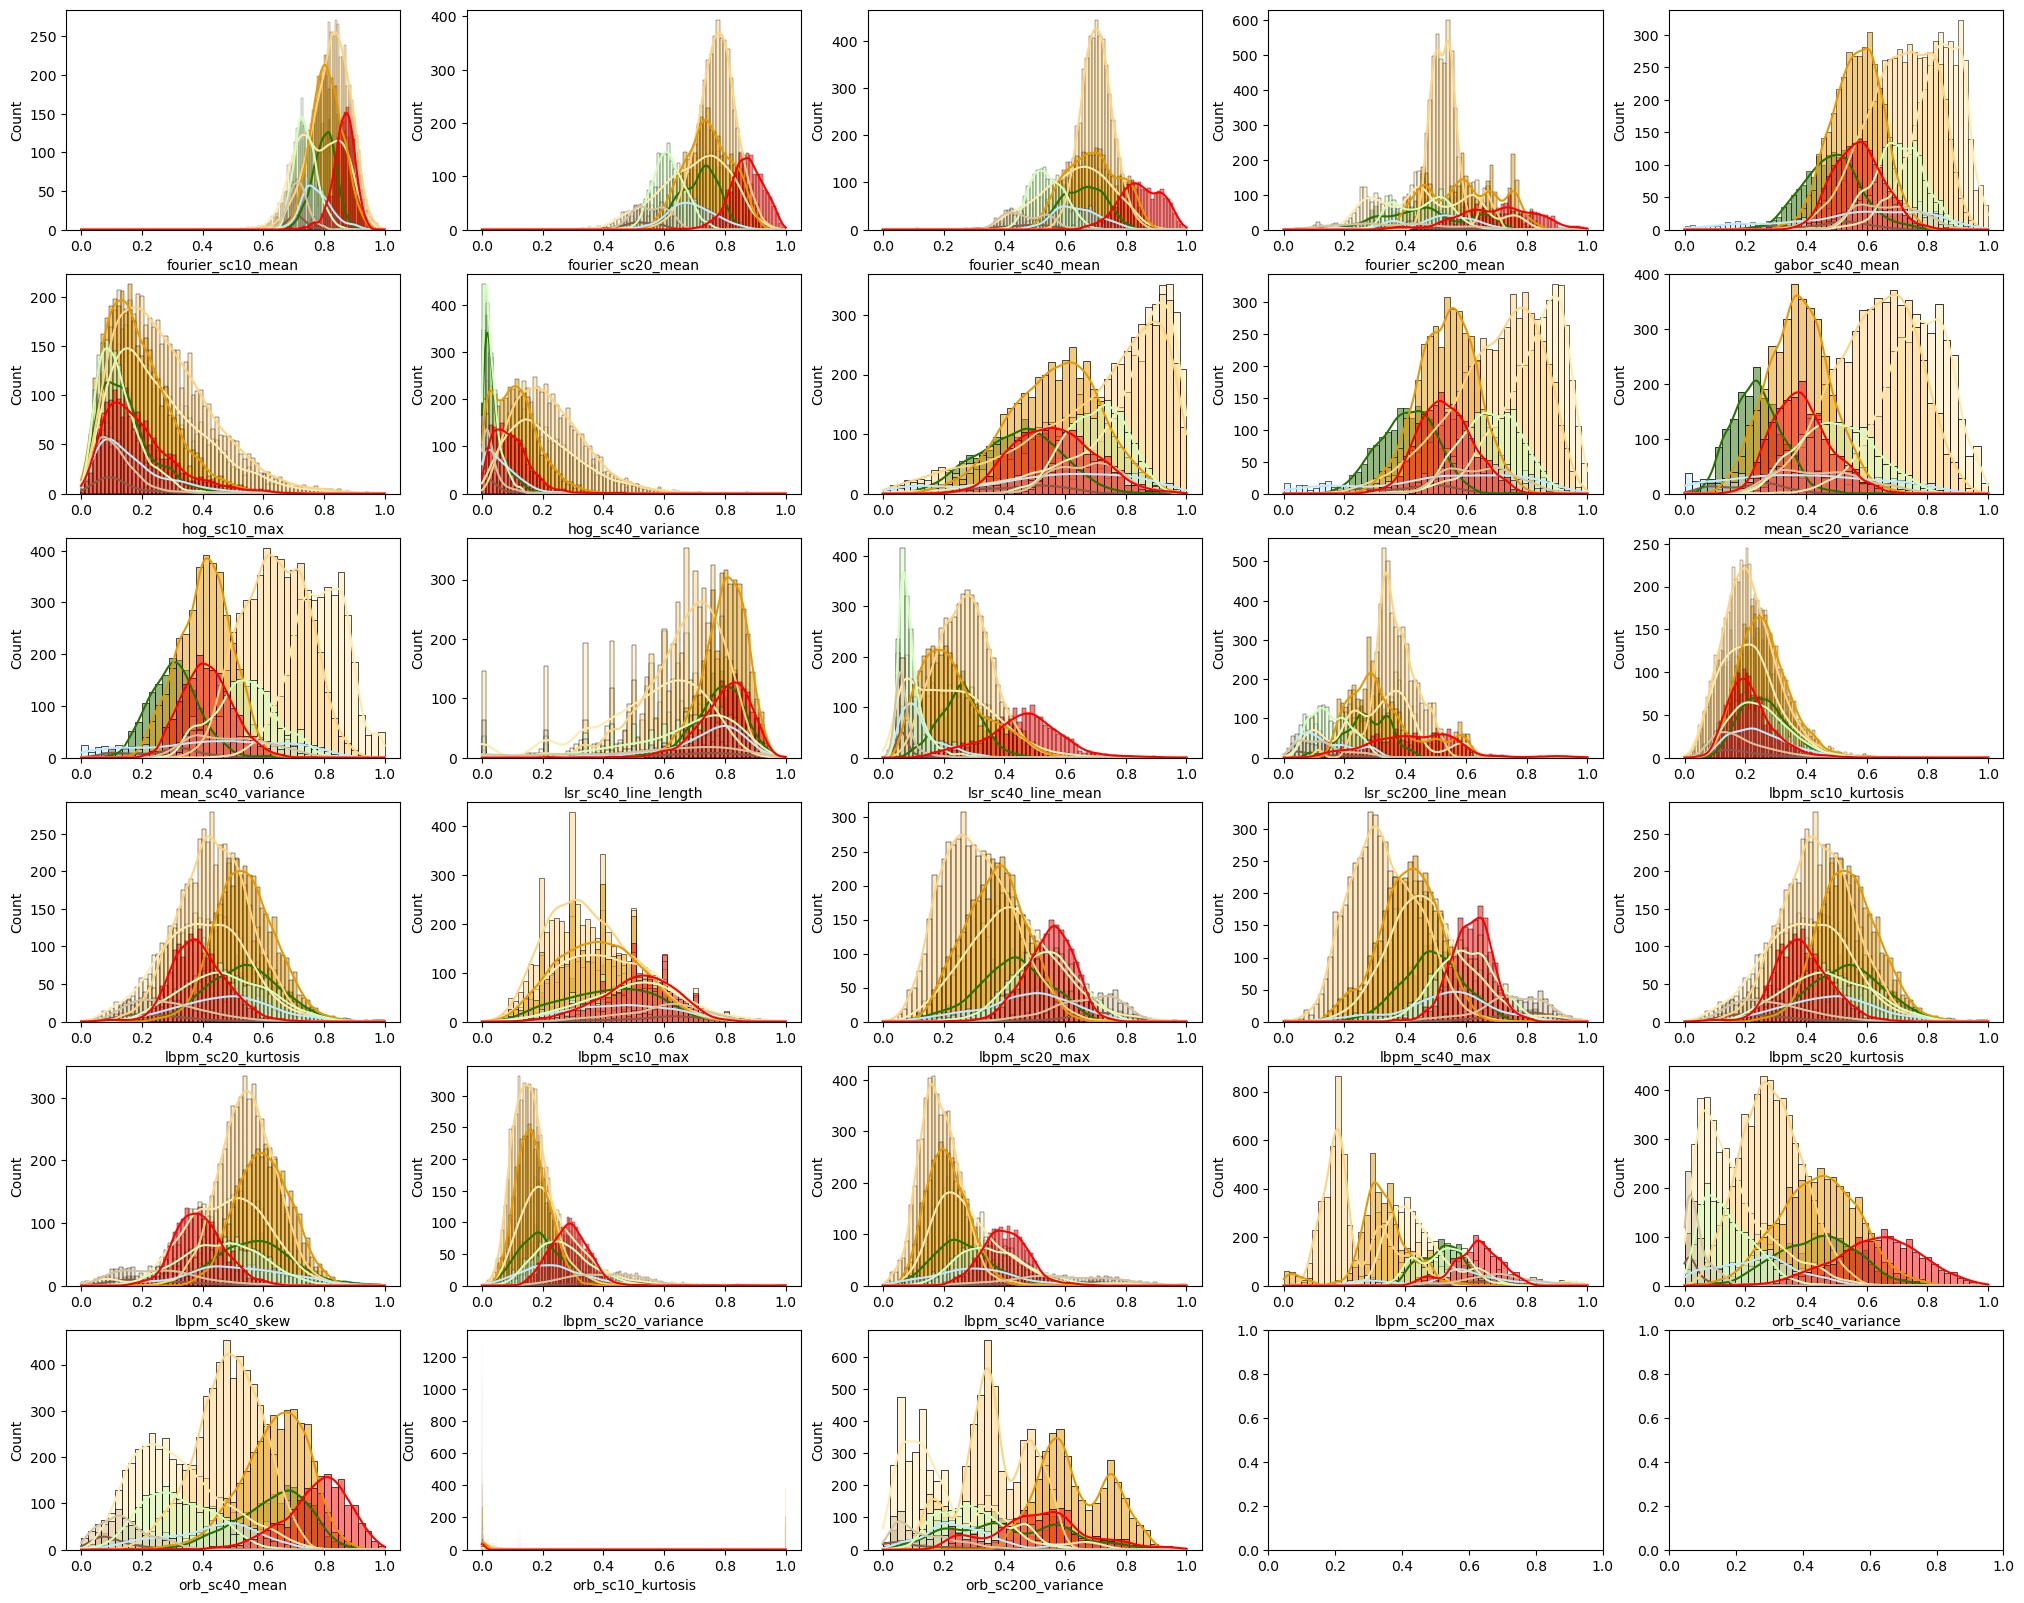

In [31]:
fig, axs = plt.subplots(6, 5, figsize=(25, 20))
color = ['#FF0000', '#D7C29E', '#D3FFBE', '#BEE8FF', '#E69800', '#FFD37F', '#FFEBAF', '#267300', '#895A44']
sns.set_palette(color)
# fourier
sns.histplot(data=South_df_ss, x="fourier_sc10_mean", palette=color, hue='class', legend=False, kde=True, ax=axs[0, 0])
sns.histplot(data=South_df_ss, x="fourier_sc20_mean", palette=color, hue='class', legend=False, kde=True, ax=axs[0, 1])
sns.histplot(data=South_df_ss, x="fourier_sc40_mean", palette=color, hue='class', legend=False, kde=True, ax=axs[0, 2])
sns.histplot(data=South_df_ss, x="fourier_sc200_mean",palette=color, hue='class', legend=False, kde=True, ax=axs[0, 3])

# Gabor
sns.histplot(data=South_df_ss, x="gabor_sc40_mean", palette=color, hue='class', legend=False, kde=True, ax=axs[0, 4])

# hog
sns.histplot(data=South_df_ss, x="hog_sc10_max", palette=color, hue='class', legend=False, kde=True, ax=axs[1, 0])
sns.histplot(data=South_df_ss, x="hog_sc40_variance", palette=color, hue='class', legend=False, kde=True, ax=axs[1, 1])

# mean
sns.histplot(data=South_df_ss, x="mean_sc10_mean",palette=color, hue='class', legend=False, kde=True, ax=axs[1, 2])
sns.histplot(data=South_df_ss, x="mean_sc20_mean", palette=color, hue='class', legend=False, kde=True, ax=axs[1, 3])
sns.histplot(data=South_df_ss, x="mean_sc20_variance",palette=color, hue='class', legend=False, kde=True, ax=axs[1, 4])

sns.histplot(data=South_df_ss, x="mean_sc40_variance", palette=color, hue='class', legend=False, kde=True, ax=axs[2, 0])

# lsr
sns.histplot(data=South_df_ss, x="lsr_sc40_line_length", palette=color, hue='class', legend=False, kde=True, ax=axs[2, 1])
sns.histplot(data=South_df_ss, x="lsr_sc40_line_mean",palette=color, hue='class', legend=False, kde=True, ax=axs[2, 2])
sns.histplot(data=South_df_ss, x="lsr_sc200_line_mean", palette=color, hue='class', legend=False, kde=True, ax=axs[2, 3])

# lbpm
sns.histplot(data=South_df_ss, x="lbpm_sc10_kurtosis",palette=color, hue='class', legend=False, kde=True, ax=axs[2, 4])
sns.histplot(data=South_df_ss, x="lbpm_sc20_kurtosis", palette=color, hue='class', legend=False, kde=True, ax=axs[3, 0])
sns.histplot(data=South_df_ss, x="lbpm_sc10_max",palette=color, hue='class', legend=False, kde=True, ax=axs[3, 1])
sns.histplot(data=South_df_ss, x="lbpm_sc20_max", palette=color, hue='class', legend=False, kde=True, ax=axs[3, 2])
sns.histplot(data=South_df_ss, x="lbpm_sc40_max",palette=color, hue='class', legend=False, kde=True, ax=axs[3, 3])
sns.histplot(data=South_df_ss, x="lbpm_sc20_kurtosis", palette=color, hue='class', legend=False, kde=True, ax=axs[3, 4])


sns.histplot(data=South_df_ss, x="lbpm_sc40_skew", palette=color, hue='class', legend=False, kde=True, ax=axs[4, 0])
sns.histplot(data=South_df_ss, x="lbpm_sc20_variance",palette=color, hue='class', legend=False, kde=True, ax=axs[4, 1])
sns.histplot(data=South_df_ss, x="lbpm_sc40_variance", palette=color, hue='class', legend=False, kde=True, ax=axs[4, 2])
sns.histplot(data=South_df_ss, x="lbpm_sc200_max",palette=color, hue='class', legend=False, kde=True, ax=axs[4, 3])
sns.histplot(data=South_df_ss, x="orb_sc40_variance", palette=color, hue='class', legend=False, kde=True, ax=axs[4, 4])

sns.histplot(data=South_df_ss, x="orb_sc40_mean", palette=color, hue='class', legend=False, kde=True, ax=axs[5, 0])
sns.histplot(data=South_df_ss, x="orb_sc10_kurtosis",palette=color, hue='class', legend=False, kde=True, ax=axs[5, 1])
sns.histplot(data=South_df_ss, x="orb_sc200_variance", palette=color, hue='class', legend=False, kde=True, ax=axs[5, 2])
# sns.histplot(data=South_df, x="lbpm_sc200_max",palette=color, hue='class', kde=True, ax=axs[5, 3])
# sns.histplot(data=South_df, x="orb_sc200_variance", palette=color, hue='class', kde=True, ax=axs[5, 4])

# classes = ['Builtup', 'Cropland', 'Pasture', 'Wetland', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub', 'Cropland Dark']

# axs[5, 1].legend(title='Class', loc='upper right', labels=classes)
plt.show()

<AxesSubplot: xlabel='orb_sc200_variance', ylabel='Count'>

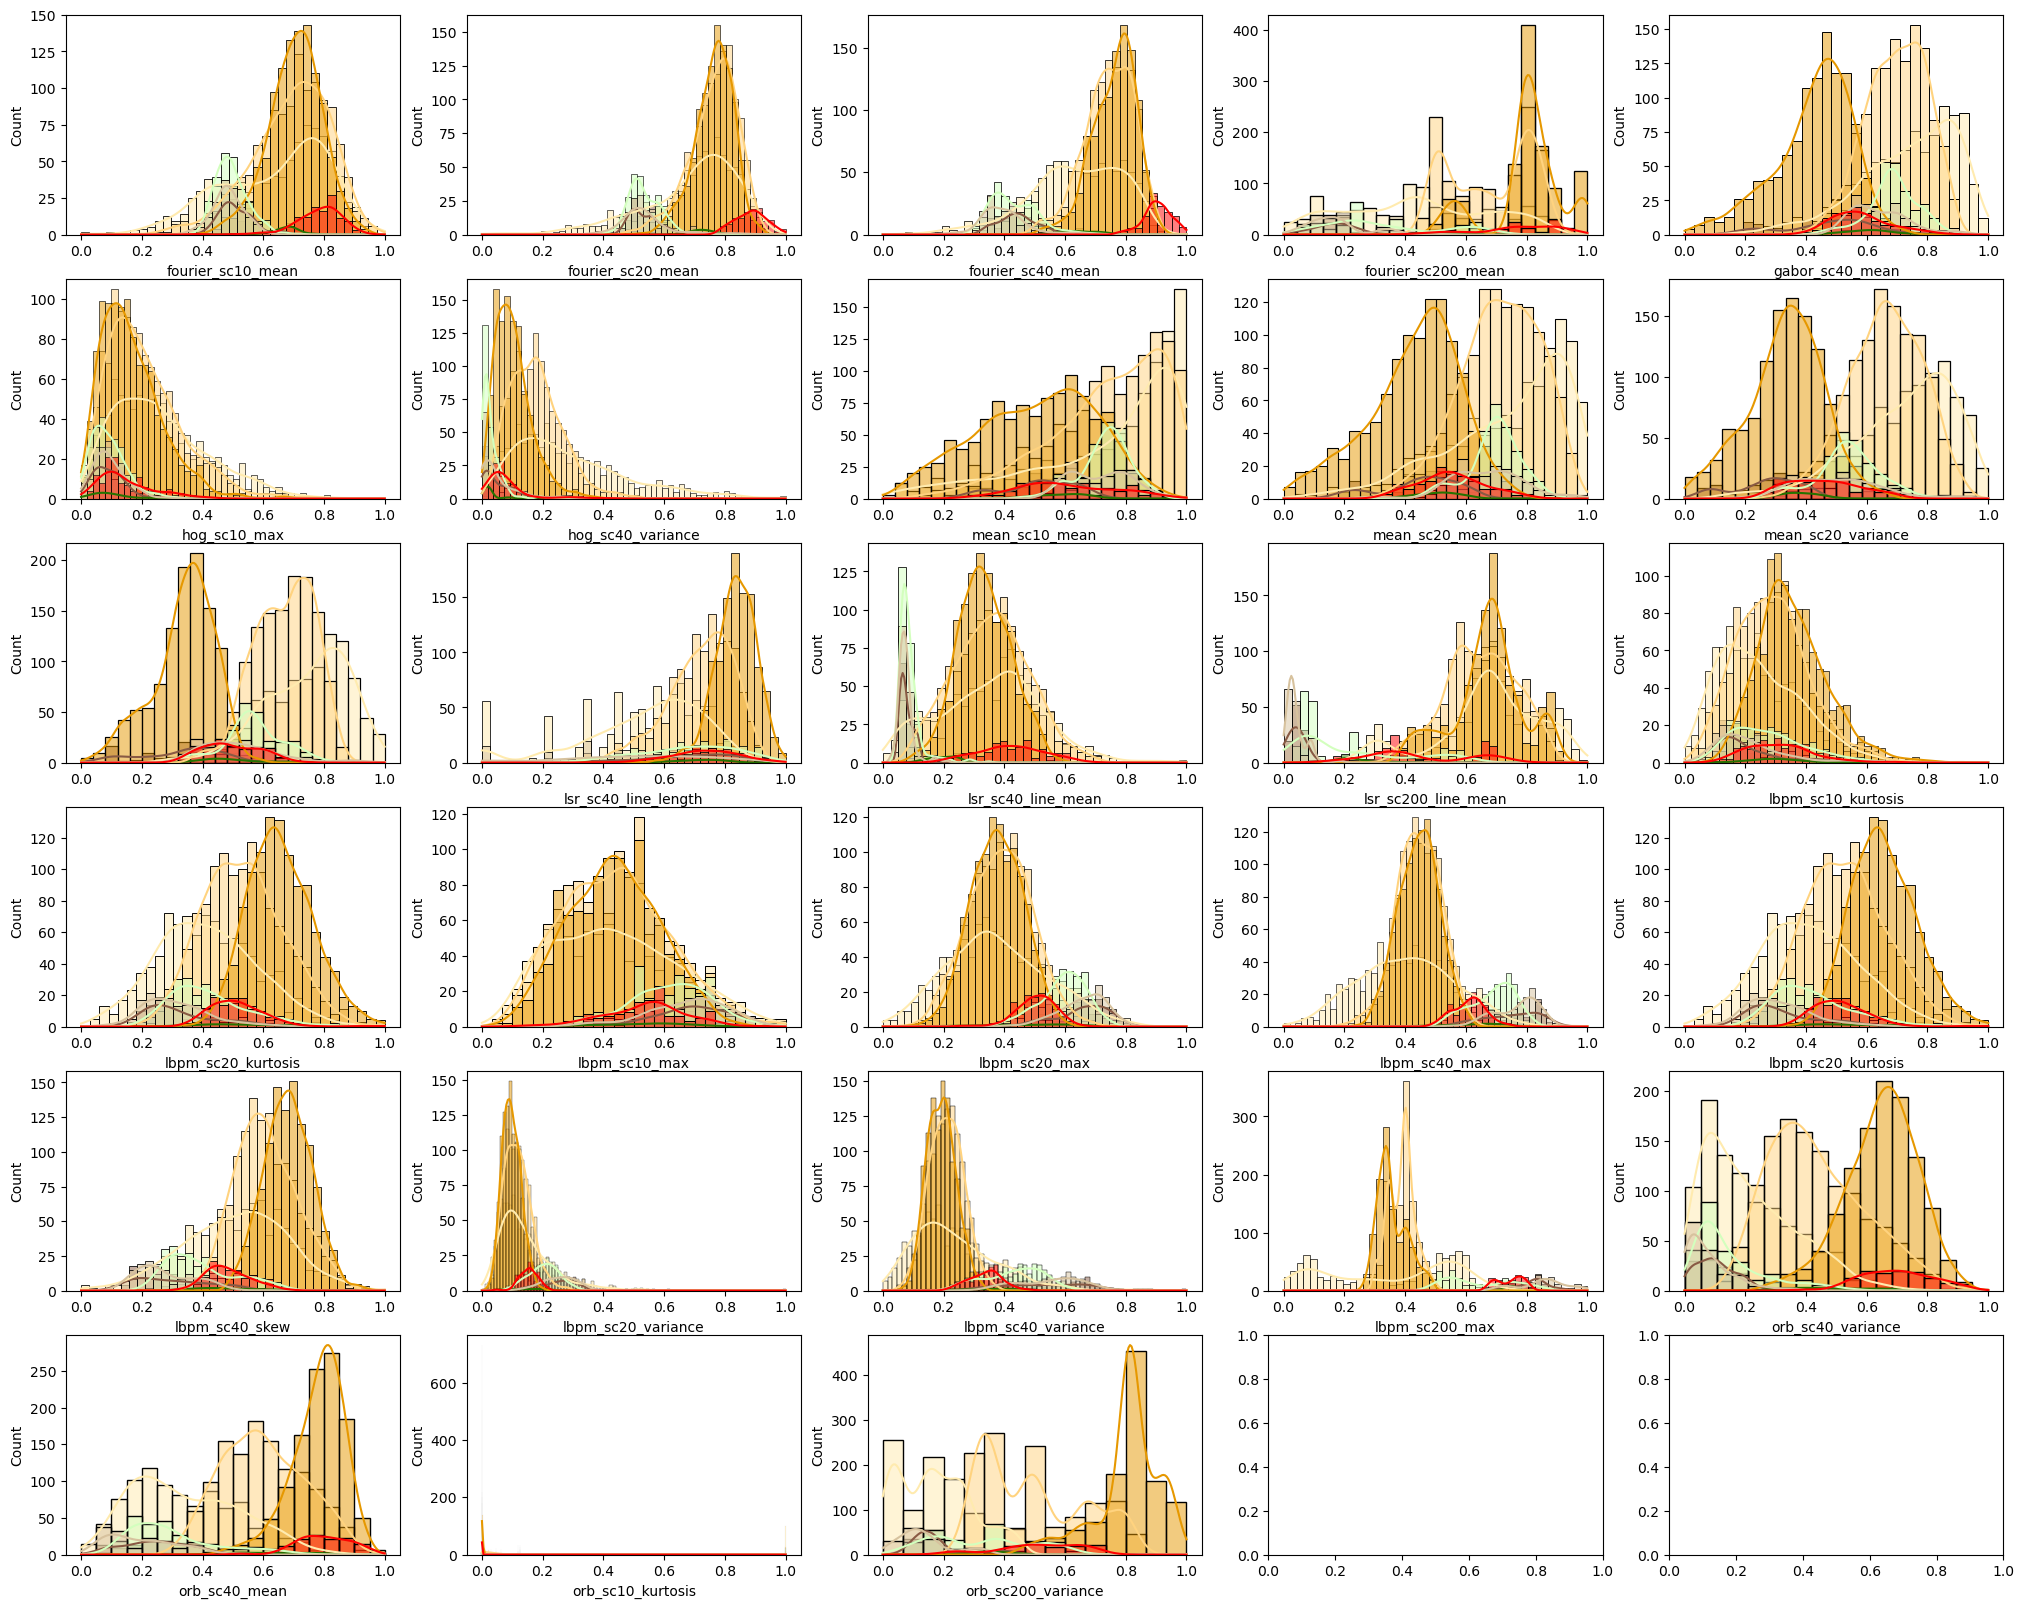

In [32]:
fig, axs = plt.subplots(6, 5, figsize=(25, 20))
color = ['#FF0000', '#D7C29E', '#D3FFBE', '#E69800', '#FFD37F', '#FFEBAF', '#267300', '#895A44']
sns.set_palette(color)
# fourier
sns.histplot(data=North_df_ss, x="fourier_sc10_mean", palette=color, hue='class', legend=False, kde=True, ax=axs[0, 0])
sns.histplot(data=North_df_ss, x="fourier_sc20_mean", palette=color, hue='class', legend=False, kde=True, ax=axs[0, 1])
sns.histplot(data=North_df_ss, x="fourier_sc40_mean", palette=color, hue='class', legend=False, kde=True, ax=axs[0, 2])
sns.histplot(data=North_df_ss, x="fourier_sc200_mean",palette=color, hue='class', legend=False, kde=True, ax=axs[0, 3])

# Gabor
sns.histplot(data=North_df_ss, x="gabor_sc40_mean", palette=color, hue='class', legend=False, kde=True, ax=axs[0, 4])

# hog
sns.histplot(data=North_df_ss, x="hog_sc10_max", palette=color, hue='class', legend=False, kde=True, ax=axs[1, 0])
sns.histplot(data=North_df_ss, x="hog_sc40_variance", palette=color, hue='class', legend=False, kde=True, ax=axs[1, 1])

# mean
sns.histplot(data=North_df_ss, x="mean_sc10_mean",palette=color, hue='class', legend=False, kde=True, ax=axs[1, 2])
sns.histplot(data=North_df_ss, x="mean_sc20_mean", palette=color, hue='class', legend=False, kde=True, ax=axs[1, 3])
sns.histplot(data=North_df_ss, x="mean_sc20_variance",palette=color, hue='class', legend=False, kde=True, ax=axs[1, 4])

sns.histplot(data=North_df_ss, x="mean_sc40_variance", palette=color, hue='class', legend=False, kde=True, ax=axs[2, 0])

# lsr
sns.histplot(data=North_df_ss, x="lsr_sc40_line_length", palette=color, hue='class', legend=False, kde=True, ax=axs[2, 1])
sns.histplot(data=North_df_ss, x="lsr_sc40_line_mean",palette=color, hue='class', legend=False, kde=True, ax=axs[2, 2])
sns.histplot(data=North_df_ss, x="lsr_sc200_line_mean", palette=color, hue='class', legend=False, kde=True, ax=axs[2, 3])

# lbpm
sns.histplot(data=North_df_ss, x="lbpm_sc10_kurtosis",palette=color, hue='class', legend=False, kde=True, ax=axs[2, 4])
sns.histplot(data=North_df_ss, x="lbpm_sc20_kurtosis", palette=color, hue='class', legend=False, kde=True, ax=axs[3, 0])
sns.histplot(data=North_df_ss, x="lbpm_sc10_max",palette=color, hue='class', legend=False, kde=True, ax=axs[3, 1])
sns.histplot(data=North_df_ss, x="lbpm_sc20_max", palette=color, hue='class', legend=False, kde=True, ax=axs[3, 2])
sns.histplot(data=North_df_ss, x="lbpm_sc40_max",palette=color, hue='class', legend=False, kde=True, ax=axs[3, 3])
sns.histplot(data=North_df_ss, x="lbpm_sc20_kurtosis", palette=color, hue='class', legend=False, kde=True, ax=axs[3, 4])


sns.histplot(data=North_df_ss, x="lbpm_sc40_skew", palette=color, hue='class', legend=False, kde=True, ax=axs[4, 0])
sns.histplot(data=North_df_ss, x="lbpm_sc20_variance",palette=color, hue='class', legend=False, kde=True, ax=axs[4, 1])
sns.histplot(data=North_df_ss, x="lbpm_sc40_variance", palette=color, hue='class', legend=False, kde=True, ax=axs[4, 2])
sns.histplot(data=North_df_ss, x="lbpm_sc200_max",palette=color, hue='class', legend=False, kde=True, ax=axs[4, 3])
sns.histplot(data=North_df_ss, x="orb_sc40_variance", palette=color, hue='class', legend=False, kde=True, ax=axs[4, 4])

sns.histplot(data=North_df_ss, x="orb_sc40_mean", palette=color, hue='class', legend=False, kde=True, ax=axs[5, 0])
sns.histplot(data=North_df_ss, x="orb_sc10_kurtosis",palette=color, hue='class', legend=False, kde=True, ax=axs[5, 1])
sns.histplot(data=North_df_ss, x="orb_sc200_variance", palette=color, hue='class', legend=False, kde=True, ax=axs[5, 2])
# sns.histplot(data=South_df, x="lbpm_sc200_max",palette=color, hue='class', kde=True, ax=axs[5, 3])
# sns.histplot(data=South_df, x="orb_sc200_variance", palette=color, hue='class', kde=True, ax=axs[5, 4])

# classes = ['Builtup', 'Cropland', 'Pasture', 'Fixeddune', 'Semifixeddune',  'Mobiledune','Woodyshrub', 'Cropland Dark']

# axs[5, 1].legend(title='Class', loc='upper right', labels=classes)

## Save Training dataset

In [108]:
# Save CSV for modelling 

# South
outfile = 'D:/Mongolia_Grassland_Mapping/DATA/Output/South_Trainset_csv.csv'
South_df.to_csv(outfile, index=False)

# North
outfile = 'D:/Mongolia_Grassland_Mapping/DATA/Output/North_Trainset_csv.csv'
North_df.to_csv(outfile, index=False)
